# Q2

# Linear Discriminant Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
class LinearDiscriminantAnalysis:
    def __init__(self, n_components=None):
        self.n_components_ = n_components
        self.W_ = None
        self.b_ = None
        self.X_ = None
        self.y_ = None
        self.X_new_ = None

    def fit(self, X, y):
        self.X_ = X
        self.y_ = y
        unique_classes = np.unique(y)

        class_means = np.array([np.mean(X[y == c], axis=0) for c in unique_classes])
        overall_mean = np.mean(X, axis=0)
        scatter_within = sum([np.dot((X[y == c] - class_means[i]).T, (X[y == c] - class_means[i])) for i, c in enumerate(unique_classes)])
        scatter_between = np.dot((class_means - overall_mean).T, (class_means - overall_mean))

        eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(scatter_within).dot(scatter_between))
        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvectors = eigenvectors[:, sorted_indices]
        if self.n_components_ is not None:
            self.W_ = eigenvectors[:, :self.n_components_]
        else:
            self.W_ = eigenvectors
        self.b_ = np.dot(class_means, self.W_)

        self.X_new_ = np.dot(X, self.W_)
        return self.W_, self.b_

    def plot(self):
        df = pd.DataFrame(np.hstack((self.X_new_, self.y_.reshape(-1, 1))))
        class_0 = df[df[2] == 0].values
        class_1 = df[df[2] == 1].values
        class_2 = df[df[2] == 2].values
        plt.scatter(x=class_0[:,0], y=class_0[:,1], color='red')
        plt.scatter(x=class_1[:,0], y=class_1[:,1], color='green')
        plt.scatter(x=class_2[:,0], y=class_2[:,1], color='blue')
        txt = "Red - Class 0\nGreen - Class 1\nBlue - Class 2"
        plt.figtext(0.4, -0.1, txt, wrap=True, horizontalalignment='left', fontsize=12)
        plt.show()

In [3]:
X, y = load_iris(return_X_y=True)

In [4]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [5]:
y[:5]

array([0, 0, 0, 0, 0])

In [6]:
lda = LinearDiscriminantAnalysis(n_components=2)
W, b = lda.fit(X, y)

In [7]:
lda.X_new_[:5]

array([[ 1.49920971, -1.88675441],
       [ 1.2643595 , -1.59214275],
       [ 1.35525305, -1.73341462],
       [ 1.18495616, -1.62358806],
       [ 1.5169559 , -1.94476227]])

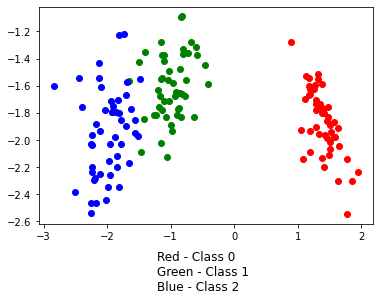

In [8]:
lda.plot()